In [2]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
#Carga de los archivos csv por año ubicados en: https://drive.google.com/drive/folders/10BtFS1WbWR7ZQ19MlgSB74CF0we8ztUB?usp=drive_link 
df_2020 = pd.read_csv('D:/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2020.csv')
df_2021 = pd.read_csv('D:/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2021.csv')
df_2022 = pd.read_csv('D:/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2022.csv')
df_2023 = pd.read_csv('D:/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2023.csv')
df_2024 = pd.read_csv('D:/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2024.csv')
df_2025 = pd.read_csv('D:/DevHitss/unir/Maestria/TFM/humedad_5a/TFM.humedad_2025.csv')

In [4]:
#Concatenación de los 6 archivos en un solo dataframe llamado df_concat
df_concat = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024, df_2025], axis=0, ignore_index=True)
df_concat = df_concat.drop('_id', axis=1)
#Asegurarnos que la fechamedida sea un tipo de dato datetime
df_concat['fechamedida'] = pd.to_datetime(df_concat['fechamedida'])
#Creación de columnas para posterior análisis
df_concat['anio'] = df_concat['fechamedida'].dt.year
df_concat['mes'] = df_concat['fechamedida'].dt.month
df_concat['dia'] = df_concat['fechamedida'].dt.day
df_concat['hora'] = df_concat['fechamedida'].dt.hour
df_concat['nombre_mes'] = df_concat['mes'].map({
     1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio'
     , 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
})

In [5]:
#comprobación de registros cargados desde los archivos dispuestos
print(len(df_concat))

32690394


In [37]:
#Creamos un nuevo dataframe con valores que no contengan cero (0) en el valor observado
df_filtrado = df_concat[df_concat['valorobservado'] != 0]

In [38]:
sns.set(style="whitegrid")

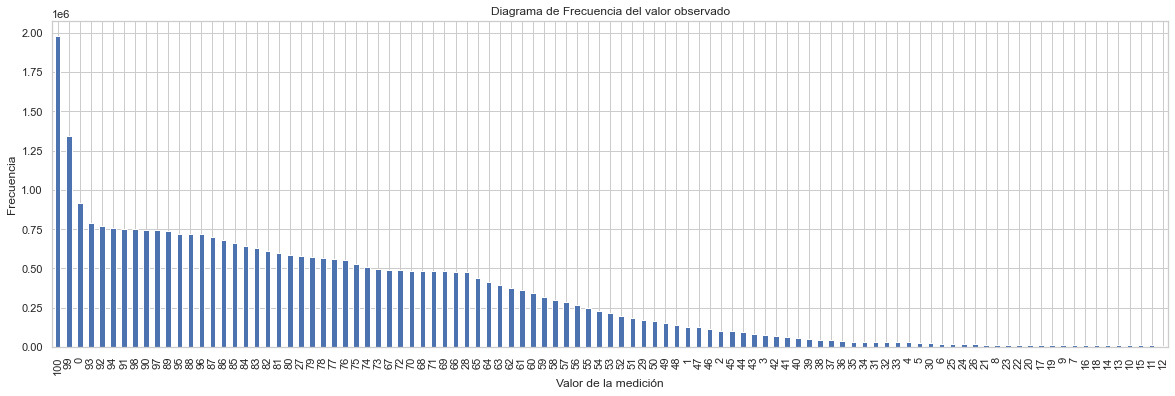

In [40]:
#Se realiza el análisis de frecuencia del valor observado y se crea una gráfica
frecuencias = df_concat['valorobservado'].value_counts()
#Exporte del valores de frecuencia
frecuencias.to_csv('frecuencias_original.txt', sep='\t', header=True)
# Crea el gráfico de barras
plt.figure(figsize=(20, 6))
frecuencias.plot(kind='bar')
plt.title('Diagrama de Frecuencia del valor observado')
plt.xlabel('Valor de la medición')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
# Verificación de valores nulos en el campo 'Valor observado'
nulos_en_columna_A = df_concat['valorobservado'].isnull().sum()
print(f"Número de valores nulos en 'valorobservado': {nulos_en_columna_A}")

# Verificación de valores nulos en el campo 'Departamento'
nulos_en_columna_B = df_concat['departamento'].isnull().sum()
print(f"Número de valores nulos en departamento: {nulos_en_columna_B}")

# Verificación de valores nulos en el campo 'Municipio'
nulos_en_columna_C = df_concat['municipio'].isnull().sum()
print(f"Número de valores nulos en municipio: {nulos_en_columna_C}")

# Verificación de valores nulos en el campo 'fechamedida '
nulos_en_columna_D = df_concat['fechamedida'].isnull().sum()
print(f"Número de valores nulos en fechamedida: {nulos_en_columna_D}")

Número de valores nulos en 'valorobservado': 0
Número de valores nulos en departamento: 0
Número de valores nulos en municipio: 0
Número de valores nulos en fechamedida: 0


Tabla de frecuencias:
                    Intervalo  Frecuencia  Frecuencia Relativa (%)  \
0                 (1.0, 10.9]      432464                 1.361058   
1                (10.9, 20.8]      113251                 0.356425   
2  (20.8, 30.700000000000003]     1339650                 4.216168   
3  (30.700000000000003, 40.6]      388409                 1.222407   
4                (40.6, 50.5]     1111954                 3.499560   
5  (50.5, 60.400000000000006]     2601109                 8.186252   
6  (60.400000000000006, 70.3]     4401499                13.852469   
7                (70.3, 80.2]     5344703                16.820936   
8   (80.2, 90.10000000000001]     6724770                21.164305   
9  (90.10000000000001, 100.0]     9316303                29.320420   

   Frecuencia Acumulada  Frecuencia Relativa Acumulada (%)  
0                432464                           1.361058  
1                545715                           1.717483  
2               1885365 

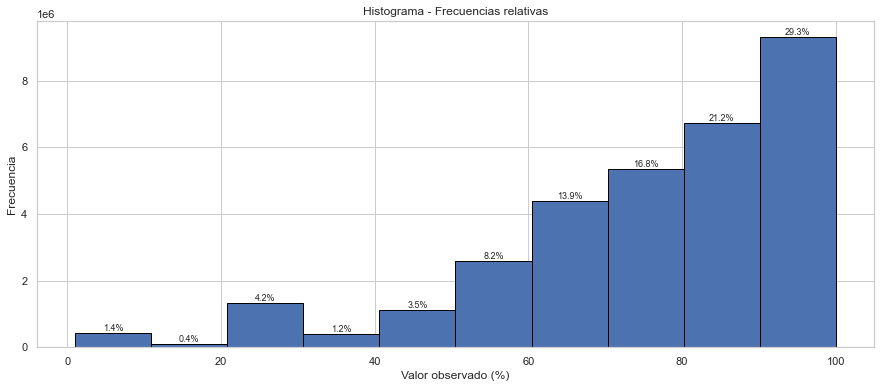

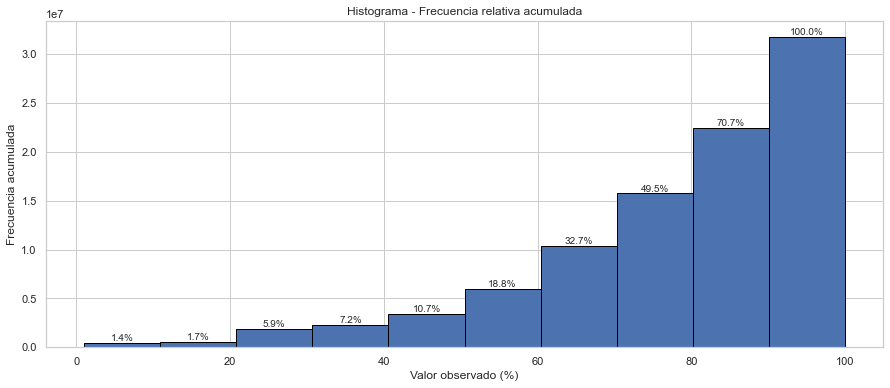

In [42]:
#Análisis de frecuencias
# Definir número de bins (intervalos)
valores = df_filtrado['valorobservado']
num_bins = 10

# Calcular frecuencias y bins
freq, bins = np.histogram(valores, bins=num_bins)
total = freq.sum()
freq_rel = freq / total * 100  # porcentaje

# Crear tabla de frecuencias
intervalos = pd.IntervalIndex.from_arrays(bins[:-1], bins[1:])
tabla_frecuencias = pd.DataFrame({
    'Intervalo': intervalos,
    'Frecuencia': freq,
    'Frecuencia Relativa (%)': freq_rel,
})
tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa Acumulada (%)'] = tabla_frecuencias['Frecuencia Relativa (%)'].cumsum()

print("Tabla de frecuencias:")
print(tabla_frecuencias)

# 1. Histograma con frecuencias absolutas y etiquetas %
plt.figure(figsize=(15,6))
bars = plt.hist(valores, bins=num_bins, edgecolor='black')
plt.title('Histograma - Frecuencias relativas')
plt.xlabel('Valor observado (%)')
plt.ylabel('Frecuencia')

# Agregar etiquetas %
for count, left, right in zip(freq, bins[:-1], bins[1:]):
    plt.text((left + right) / 2, count, f'{count/total*100:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.show()

# 2. Histograma acumulativo
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(valores, bins=num_bins, cumulative=True, edgecolor='black')

plt.title('Histograma - Frecuencia relativa acumulada')
plt.xlabel('Valor observado (%)')
plt.ylabel('Frecuencia acumulada')

# Agregar etiquetas en %
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    pct = count / total * 100
    plt.text((left + right) / 2, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.grid(True)
plt.show()

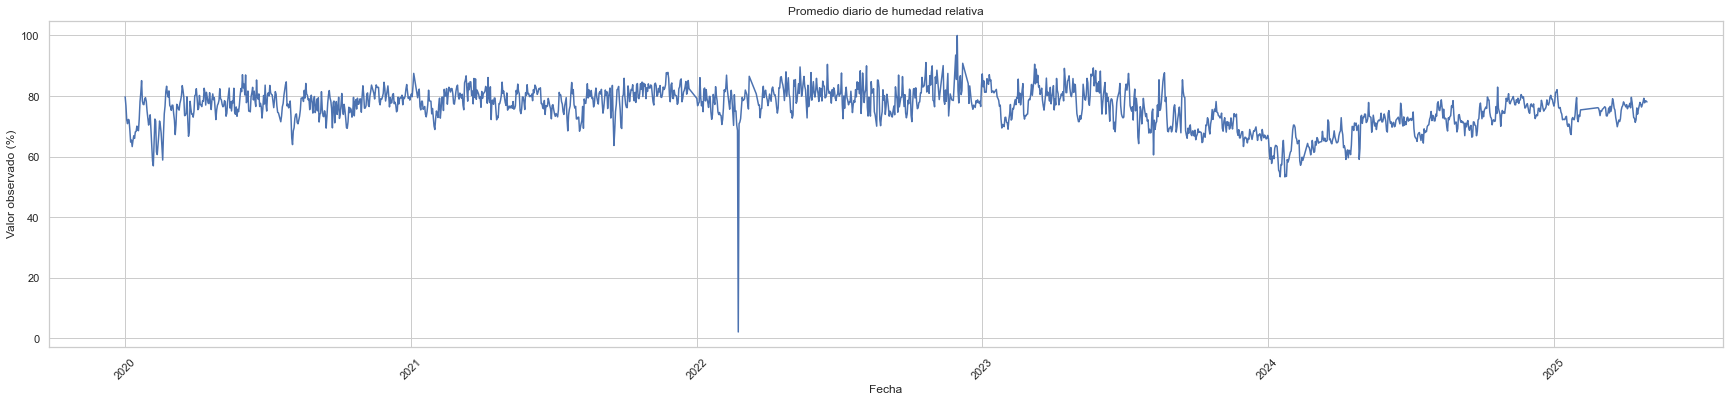

In [43]:
# Promedio diario
promedio_diario = df_filtrado.groupby(df_filtrado['fechamedida'].dt.date)['valorobservado'].mean()
#Exporte del promedio diario
promedio_diario.to_csv('promedio_diario.txt', sep='\t', header=True)
plt.figure(figsize=(30,6))
promedio_diario.plot()
plt.title('Promedio diario de humedad relativa')
plt.xlabel('Fecha')
plt.ylabel('Valor observado (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

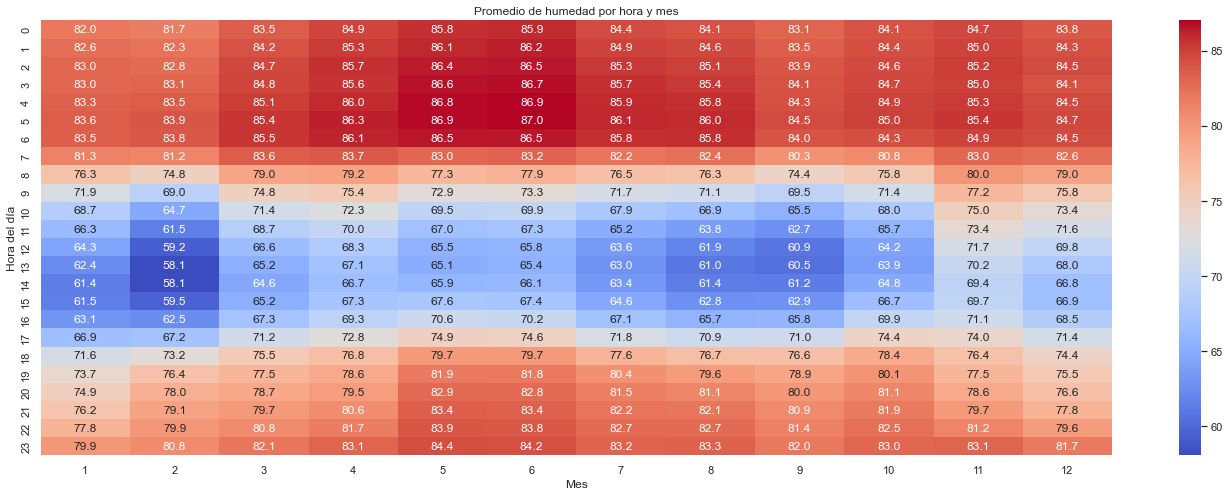

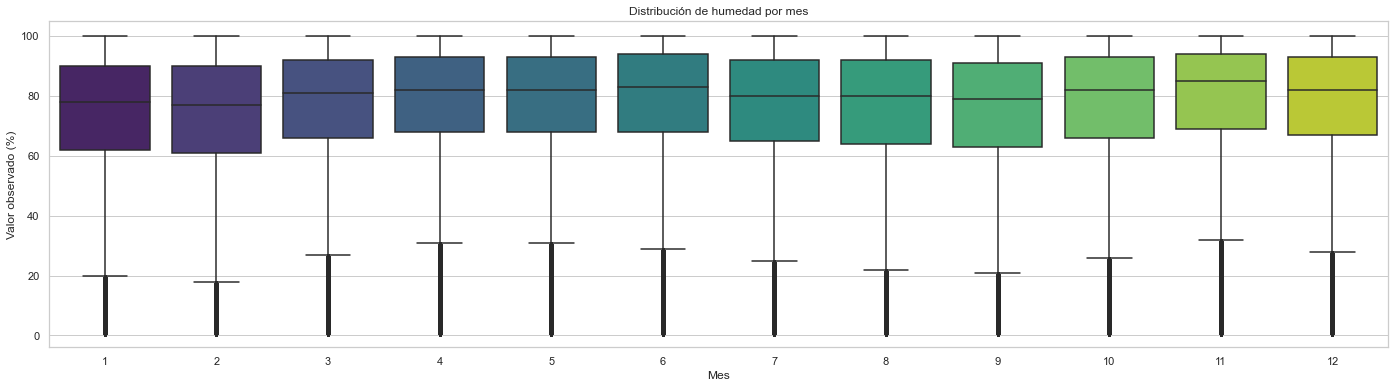

In [47]:
# Heatmap de humedad promedio por mes y hora
tabla_pivot = df_filtrado.pivot_table(index='hora', columns='mes', values='valorobservado', aggfunc='mean')

plt.figure(figsize=(24,8))
sns.heatmap(tabla_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Promedio de humedad por hora y mes')
plt.xlabel('Mes')
plt.ylabel('Hora del día')
plt.show()

# 5. Boxplot de humedad por mes
plt.figure(figsize=(24,6))
sns.boxplot(x='mes', y='valorobservado', data=df_filtrado, palette='viridis')
plt.title('Distribución de humedad por mes')
plt.xlabel('Mes')
plt.ylabel('Valor observado (%)')
plt.show()

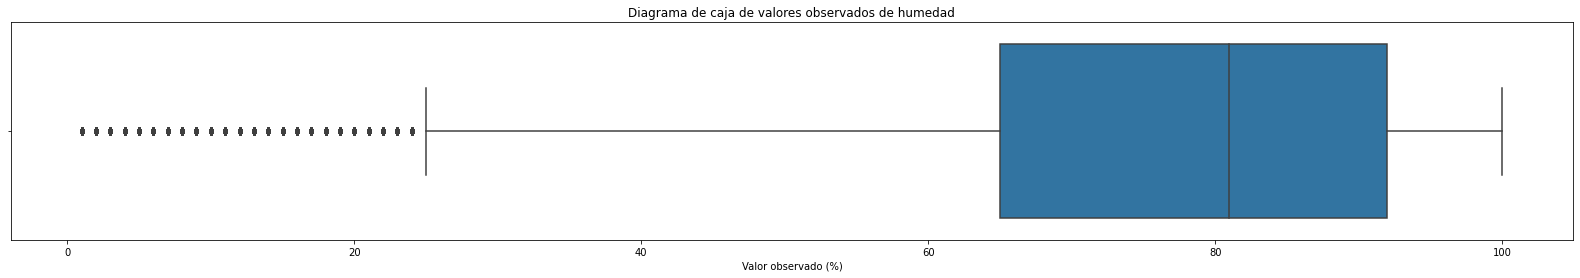

In [19]:
#OTRAS GRÁFICAS
# Boxplot para detectar outliers
plt.figure(figsize=(28,4))
sns.boxplot(x=df_filtrado['valorobservado'])
plt.title('Diagrama de caja de valores observados de humedad')
plt.xlabel('Valor observado (%)')
plt.show()

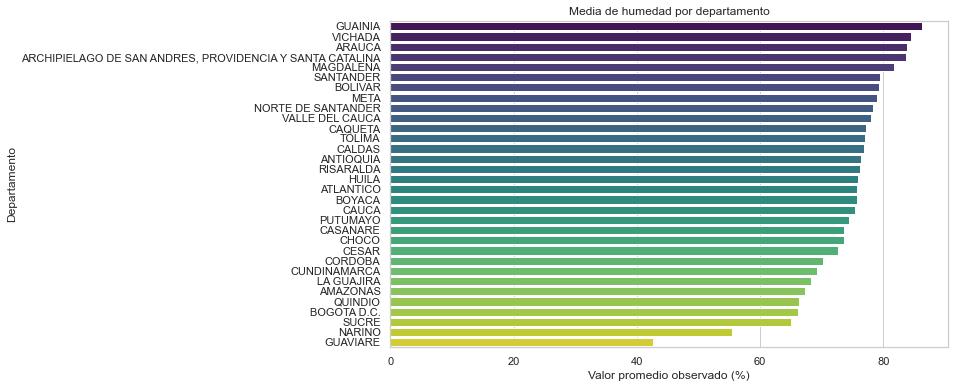

In [51]:
# Media de humedad por departamento
plt.figure(figsize=(10,6))
media_departamento = df_concat.groupby('departamento')['valorobservado'].mean().sort_values(ascending=False)
sns.barplot(x=media_departamento.values, y=media_departamento.index, palette='viridis')
plt.title('Media de humedad por departamento')
plt.xlabel('Valor promedio observado (%)')
plt.ylabel('Departamento')
plt.show()

In [ ]:
valores_unicos = df_concat['valorobservado'].unique()
print(valores_unicos)